In [1]:
# DEPENDENCIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from datetime import datetime

# DATA FILES
path = "Data/region2016.csv"
path2 = "Data/Unemployment Rates by District.csv"

# READ OFFENCE DATA
data_w_offence = pd.read_csv(path)
data_w_offence

,District,Year,Offence Group,Total Number of Offences
0,Armadale District,16,Assault Police Officer,61.0
1,Armadale District,16,Attempted / Conspiracy to Murder,0.0
2,Armadale District,16,Breach of Family Violence Restraint Order,999.0
3,Armadale District,16,Breach of Police Order,192.0
4,Armadale District,16,Breach of Violence Restraint Order,165.0
...,...,...,...,...
859,Wheatbelt District,16,Stealing From Retail Premises (Shoplift),0.0
860,Wheatbelt District,16,Stealing as a Servant,6.0
861,Wheatbelt District,16,Stealing of Motor Vehicle,126.0
862,Wheatbelt District,16,Threatening Behaviour (Family),49.0


In [2]:
# READ UNEMPLOYMENT
data_unemploy = pd.read_csv(path2)
data_unemploy

,District,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Armadale District,221535.0,245095.0,23560.0,10.63
1,Cannington District,341107.0,375806.0,34699.0,10.17
2,Fremantle District,441626.0,474743.0,33117.0,7.50
3,Goldfields-Esperance Region,85914.0,91975.0,6061.0,7.05
4,Great Southern District,123299.0,129598.0,6299.0,5.11
5,Joondalup District,607592.0,658944.0,51352.0,8.45
6,Kimberley District,47019.0,51852.0,4833.0,10.28
7,Mandurah District,364681.0,409526.0,44845.0,12.30
8,Mid West-Gascoyne District,86739.0,94658.0,7919.0,9.13
9,Midland District,418225.0,452303.0,34078.0,8.15


In [3]:
data_unemploy_update = data_unemploy.replace({'Goldfields-Esperance Region':'Goldfields-Esperance District'})
data_unemploy_update

,District,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Armadale District,221535.0,245095.0,23560.0,10.63
1,Cannington District,341107.0,375806.0,34699.0,10.17
2,Fremantle District,441626.0,474743.0,33117.0,7.50
3,Goldfields-Esperance District,85914.0,91975.0,6061.0,7.05
4,Great Southern District,123299.0,129598.0,6299.0,5.11
5,Joondalup District,607592.0,658944.0,51352.0,8.45
6,Kimberley District,47019.0,51852.0,4833.0,10.28
7,Mandurah District,364681.0,409526.0,44845.0,12.30
8,Mid West-Gascoyne District,86739.0,94658.0,7919.0,9.13
9,Midland District,418225.0,452303.0,34078.0,8.15


In [4]:
merged = pd.merge(data_w_offence, data_unemploy_update, how="left", on="District")
merged

,District,Year,Offence Group,Total Number of Offences,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Armadale District,16,Assault Police Officer,61.0,221535.0,245095.0,23560.0,10.63
1,Armadale District,16,Attempted / Conspiracy to Murder,0.0,221535.0,245095.0,23560.0,10.63
2,Armadale District,16,Breach of Family Violence Restraint Order,999.0,221535.0,245095.0,23560.0,10.63
3,Armadale District,16,Breach of Police Order,192.0,221535.0,245095.0,23560.0,10.63
4,Armadale District,16,Breach of Violence Restraint Order,165.0,221535.0,245095.0,23560.0,10.63
...,...,...,...,...,...,...,...,...
859,Wheatbelt District,16,Stealing From Retail Premises (Shoplift),0.0,84585.0,90189.0,5604.0,6.63
860,Wheatbelt District,16,Stealing as a Servant,6.0,84585.0,90189.0,5604.0,6.63
861,Wheatbelt District,16,Stealing of Motor Vehicle,126.0,84585.0,90189.0,5604.0,6.63
862,Wheatbelt District,16,Threatening Behaviour (Family),49.0,84585.0,90189.0,5604.0,6.63


In [5]:
merged = merged[merged["District"] !="Western Australia"]
merged = merged[merged["District"] !="Regional WA Region"]
merged = merged[merged["District"] !="Metropolitan Region"]

In [6]:
list(merged.District.unique())

['Armadale District',
 'Cannington District',
 'Fremantle District',
 'Goldfields-Esperance District',
 'Great Southern District',
 'Joondalup District',
 'Kimberley District',
 'Mandurah District',
 'Mid West-Gascoyne District',
 'Midland District',
 'Mirrabooka District',
 'Perth District',
 'Pilbara District',
 'South West District',
 'Wheatbelt District']

In [7]:
merged.to_csv('Data/unemployment_offences2.csv',index=False)

In [8]:
merged.columns

Index(['District', 'Year', 'Offence Group', 'Total Number of Offences',
       'Total Employed', 'Total Persons', 'Unemployed',
       'Unemployment Rate (%)'],
      dtype='object')

In [9]:
offence_list = merged['Offence Group'].unique()
offence_list.tolist()

['Assault Police Officer',
 'Attempted / Conspiracy to Murder',
 'Breach of Family Violence Restraint Order',
 'Breach of Police Order',
 'Breach of Violence Restraint Order',
 'Burglary (Dwelling)',
 'Burglary (Non-Dwelling)',
 'Cause Bushfire',
 'Cause Damage by Fire',
 'Common Assault (Family)',
 'Common Assault (Non-Family)',
 'Criminal Damage',
 'Cultivate or Manufacture Drugs',
 'Damage',
 'Deprivation of Liberty',
 'Driving Causing Death',
 'Drug Dealing',
 'Drug Possession',
 'Forgery',
 'Fraud (Credit Card)',
 'Fraud (Not Elsewhere Classified)',
 'Graffiti',
 'Kidnapping / Child Stealing',
 'Manslaughter',
 'Murder',
 'Non-Assaultive Sexual Offences',
 'Other Drug Offences',
 'Other Fire Related Offences',
 'Possess Stolen Property',
 'Possess Weapon to Cause Fear (Family)',
 'Possess Weapon to Cause Fear (Non-Family)',
 'Possession of Drug Paraphernalia',
 'Receiving Stolen Property',
 'Regulated Weapons Offences',
 'Robbery (Business)',
 'Robbery (Non-Business)',
 'Serious A

In [10]:
# DATA FILES
path3 = 'Data/unemployment_offences2.csv'

# READ UNEMPLOYMENT/ OFFENCE DATA
unemploy_offence_csv = pd.read_csv(path3)
path4 = 'Data/offence_groups.csv'

# READ OFFENCE GROUPS 
offence_groups_csv = pd.read_csv(path4)

In [11]:
unemploy_offence_csv

,District,Year,Offence Group,Total Number of Offences,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Armadale District,16,Assault Police Officer,61.0,221535.0,245095.0,23560.0,10.63
1,Armadale District,16,Attempted / Conspiracy to Murder,0.0,221535.0,245095.0,23560.0,10.63
2,Armadale District,16,Breach of Family Violence Restraint Order,999.0,221535.0,245095.0,23560.0,10.63
3,Armadale District,16,Breach of Police Order,192.0,221535.0,245095.0,23560.0,10.63
4,Armadale District,16,Breach of Violence Restraint Order,165.0,221535.0,245095.0,23560.0,10.63
...,...,...,...,...,...,...,...,...
715,Wheatbelt District,16,Stealing From Retail Premises (Shoplift),0.0,84585.0,90189.0,5604.0,6.63
716,Wheatbelt District,16,Stealing as a Servant,6.0,84585.0,90189.0,5604.0,6.63
717,Wheatbelt District,16,Stealing of Motor Vehicle,126.0,84585.0,90189.0,5604.0,6.63
718,Wheatbelt District,16,Threatening Behaviour (Family),49.0,84585.0,90189.0,5604.0,6.63


In [12]:
offence_groups_csv

,Offence Category,Offence
0,PERSONAL,Common Assault (Non-Family)
1,PERSONAL,Threatening Behaviour (Non-Family)
2,PERSONAL,Serious Assault (Non-Family)
3,PERSONAL,Non-Assaultive Sexual Offences
4,PERSONAL,Common Assault (Family)
5,PERSONAL,Threatening Behaviour (Family)
6,PERSONAL,Serious Assault (Family)
7,PERSONAL,Kidnapping / Child Stealing
8,PERSONAL,Manslaughter
9,PERSONAL,Murder


In [13]:
merged2 = pd.merge(unemploy_offence_csv, offence_groups_csv, left_on="Offence Group",right_on='Offence')
merged2

,District,Year,Offence Group,Total Number of Offences,Total Employed,Total Persons,Unemployed,Unemployment Rate (%),Offence Category,Offence
0,Armadale District,16,Assault Police Officer,61.0,221535.0,245095.0,23560.0,10.63,STATUTORY,Assault Police Officer
1,Cannington District,16,Assault Police Officer,62.0,341107.0,375806.0,34699.0,10.17,STATUTORY,Assault Police Officer
2,Fremantle District,16,Assault Police Officer,62.0,441626.0,474743.0,33117.0,7.50,STATUTORY,Assault Police Officer
3,Goldfields-Esperance District,16,Assault Police Officer,111.0,85914.0,91975.0,6061.0,7.05,STATUTORY,Assault Police Officer
4,Great Southern District,16,Assault Police Officer,25.0,123299.0,129598.0,6299.0,5.11,STATUTORY,Assault Police Officer
...,...,...,...,...,...,...,...,...,...,...
700,Mirrabooka District,16,Threatening Behaviour (Non-Family),162.0,438507.0,476035.0,37528.0,8.56,PERSONAL,Threatening Behaviour (Non-Family)
701,Perth District,16,Threatening Behaviour (Non-Family),97.0,228282.0,244721.0,16439.0,7.20,PERSONAL,Threatening Behaviour (Non-Family)
702,Pilbara District,16,Threatening Behaviour (Non-Family),38.0,119276.0,124766.0,5490.0,4.60,PERSONAL,Threatening Behaviour (Non-Family)
703,South West District,16,Threatening Behaviour (Non-Family),69.0,270572.0,291865.0,21293.0,7.87,PERSONAL,Threatening Behaviour (Non-Family)


In [14]:
grouped_merged2 = merged2.groupby('District')
grouped_merged2 = merged2.groupby(['District','Offence Category'])

grouped_merged2

In [15]:
grouped_merging = merged2.set_index(['District','Offence Category'])


In [16]:
grouped_merging.head(20)

,,Year,Offence Group,Total Number of Offences,Total Employed,Total Persons,Unemployed,Unemployment Rate (%),Offence
District,Offence Category,,,,,,,,
Armadale District,STATUTORY,16,Assault Police Officer,61.0,221535.0,245095.0,23560.0,10.63,Assault Police Officer
Cannington District,STATUTORY,16,Assault Police Officer,62.0,341107.0,375806.0,34699.0,10.17,Assault Police Officer
Fremantle District,STATUTORY,16,Assault Police Officer,62.0,441626.0,474743.0,33117.0,7.50,Assault Police Officer
Goldfields-Esperance District,STATUTORY,16,Assault Police Officer,111.0,85914.0,91975.0,6061.0,7.05,Assault Police Officer
Great Southern District,STATUTORY,16,Assault Police Officer,25.0,123299.0,129598.0,6299.0,5.11,Assault Police Officer
Joondalup District,STATUTORY,16,Assault Police Officer,60.0,607592.0,658944.0,51352.0,8.45,Assault Police Officer
Kimberley District,STATUTORY,16,Assault Police Officer,72.0,47019.0,51852.0,4833.0,10.28,Assault Police Officer
Mandurah District,STATUTORY,16,Assault Police Officer,71.0,364681.0,409526.0,44845.0,12.30,Assault Police Officer
Mid West-Gascoyne District,STATUTORY,16,Assault Police Officer,39.0,86739.0,94658.0,7919.0,9.13,Assault Police Officer


In [17]:
pivot = grouped_merging.pivot_table(index=['District','Total Persons'],columns='Offence Category', values='Total Number of Offences', aggfunc='sum')
pivot

,Offence Category,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY
District,Total Persons,,,,,
Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0
Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0
Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0
Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0
Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0
Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0
Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0
Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0
Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0


In [18]:
df = pivot.reset_index()

In [19]:
df

Offence Category,District,Total Persons,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY
0,Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0
1,Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0
2,Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0
3,Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0
4,Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0
5,Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0
6,Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0
7,Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0
8,Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0
9,Midland District,452303.0,1488.0,272.0,4095.0,15080.0,4472.0


In [20]:
df['Offence Rate (%)'] = (df['FINANCIAL']+df['INCHOATE']+df['PERSONAL']+df['PROPERTY']+df['STATUTORY'])/df['Total Persons']
df

Offence Category,District,Total Persons,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY,Offence Rate (%)
0,Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0,0.111512
1,Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0,0.080741
2,Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0,0.058261
3,Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0,0.105398
4,Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0,0.064800
5,Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0,0.041979
6,Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0,0.213068
7,Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0,0.074747
8,Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0,0.122314
9,Midland District,452303.0,1488.0,272.0,4095.0,15080.0,4472.0,0.056173


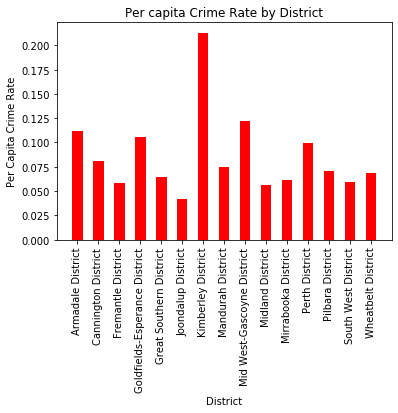

In [21]:
x = df['District'] 
y = df['Offence Rate (%)']
x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, y, color='red',align= "center", width=.5)
plt.xlabel("District")
plt.ylabel("Per Capita Crime Rate")
plt.title("Per capita Crime Rate by District")
plt.xticks(x_pos, x)
plt.xticks(rotation=90)
plt.savefig('percapita')
plt.show()

In [22]:
# MERGING WITH UNEMPLOYMENT DATA AND DROPPING UNWANTED COL
percap_merge = pd.merge(df, data_unemploy_update, how="left", on="District")
percap_merge

,District,Total Persons_x,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY,Offence Rate (%),Total Employed,Total Persons_y,Unemployed,Unemployment Rate (%)
0,Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0,0.111512,221535.0,245095.0,23560.0,10.63
1,Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0,0.080741,341107.0,375806.0,34699.0,10.17
2,Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0,0.058261,441626.0,474743.0,33117.0,7.50
3,Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0,0.105398,85914.0,91975.0,6061.0,7.05
4,Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0,0.064800,123299.0,129598.0,6299.0,5.11
5,Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0,0.041979,607592.0,658944.0,51352.0,8.45
6,Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0,0.213068,47019.0,51852.0,4833.0,10.28
7,Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0,0.074747,364681.0,409526.0,44845.0,12.30
8,Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0,0.122314,86739.0,94658.0,7919.0,9.13
9,Midland District,452303.0,1488.0,272.0,4095.0,15080.0,4472.0,0.056173,418225.0,452303.0,34078.0,8.15


In [23]:
del percap_merge['Total Employed']

In [24]:
del percap_merge['Total Persons_y']

In [25]:
del percap_merge['Unemployed']

In [26]:
percap_merge

,District,Total Persons_x,FINANCIAL,INCHOATE,PERSONAL,PROPERTY,STATUTORY,Offence Rate (%),Unemployment Rate (%)
0,Armadale District,245095.0,1370.0,281.0,3976.0,16547.0,5157.0,0.111512,10.63
1,Cannington District,375806.0,1977.0,309.0,3184.0,21111.0,3762.0,0.080741,10.17
2,Fremantle District,474743.0,1904.0,186.0,2820.0,18944.0,3805.0,0.058261,7.50
3,Goldfields-Esperance District,91975.0,552.0,117.0,1523.0,5566.0,1936.0,0.105398,7.05
4,Great Southern District,129598.0,840.0,45.0,1275.0,4037.0,2201.0,0.064800,5.11
5,Joondalup District,658944.0,1181.0,162.0,3622.0,16451.0,6246.0,0.041979,8.45
6,Kimberley District,51852.0,410.0,230.0,3308.0,4852.0,2248.0,0.213068,10.28
7,Mandurah District,409526.0,1628.0,317.0,4753.0,18943.0,4970.0,0.074747,12.30
8,Mid West-Gascoyne District,94658.0,481.0,106.0,1710.0,6549.0,2732.0,0.122314,9.13
9,Midland District,452303.0,1488.0,272.0,4095.0,15080.0,4472.0,0.056173,8.15


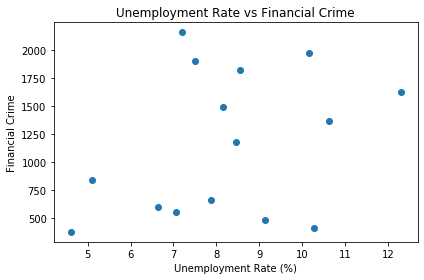

In [38]:
unemploy_rate=percap_merge['Unemployment Rate (%)']
financial=percap_merge['FINANCIAL']
plt.scatter(unemploy_rate,financial)

plt.title('Unemployment Rate vs Financial Crime')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Financial Crime')
plt.tight_layout()
plt.show()

In [40]:
linear_regression = st.linregress(unemploy_rate,financial)
linear_regression

LinregressResult(slope=102.21338006377314, intercept=319.7573215143817, rvalue=0.3311333822413389, pvalue=0.22797266008603317, stderr=80.78182436290268)

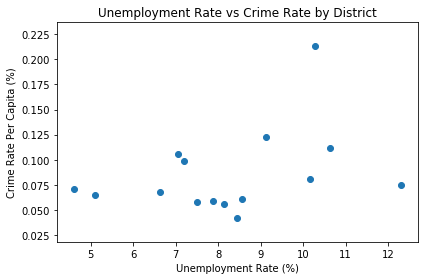

In [39]:
unemploy_rate=percap_merge['Unemployment Rate (%)']
offence_rate=percap_merge['Offence Rate (%)']
plt.scatter(unemploy_rate,offence_rate)

plt.title('Unemployment Rate vs Crime Rate by District')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Crime Rate Per Capita (%)')
plt.tight_layout()
plt.show()

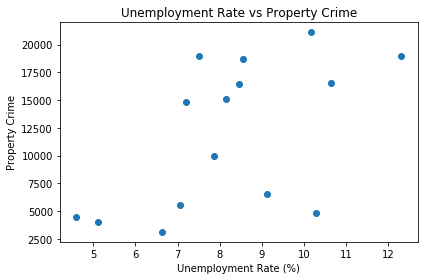

In [41]:
unemploy_rate=percap_merge['Unemployment Rate (%)']
financial=percap_merge['PROPERTY']
plt.scatter(unemploy_rate,financial)

plt.title('Unemployment Rate vs Property Crime')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Property Crime')
plt.tight_layout()
plt.show()

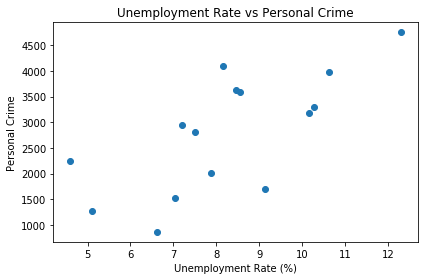

In [46]:
unemploy_rate=percap_merge['Unemployment Rate (%)']
personal=percap_merge['PERSONAL']
plt.scatter(unemploy_rate,personal)

plt.title('Unemployment Rate vs Personal Crime')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Personal Crime')
plt.tight_layout()
plt.show()

In [47]:
linear_regression = st.linregress(unemploy_rate,personal)
linear_regression

LinregressResult(slope=390.81641928004905, intercept=-426.84226103949777, rvalue=0.7048428356978976, pvalue=0.0033414163478541945, stderr=109.08817455929288)

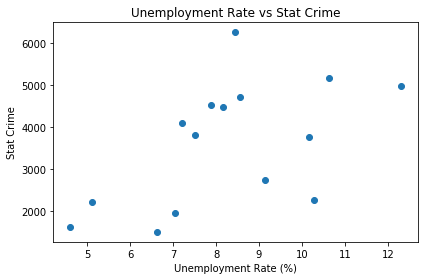

In [48]:
unemploy_rate=percap_merge['Unemployment Rate (%)']
stat=percap_merge['STATUTORY']
plt.scatter(unemploy_rate,stat)

plt.title('Unemployment Rate vs Stat Crime')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Stat Crime')
plt.tight_layout()
plt.show()

In [49]:
linear_regression = st.linregress(unemploy_rate,stat)
linear_regression

LinregressResult(slope=381.97362590652176, intercept=448.9733752784473, rvalue=0.5385925814588344, pvalue=0.038317984650836884, stderr=165.73164361241604)